In [1]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    format='%(asctime)s:%(levelname)s - %(message)s',
                    filemode='w')
logging.info('Model Started')

In [3]:
#  Import Dataset Using Pandas Functions
df = pd.read_csv('loan_data.csv',sep = ',')
df.sample(frac=1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
42412,27.0,female,Associate,127479.0,4,MORTGAGE,34121.0,EDUCATION,17.44,0.27,5.0,587,No,1
9940,23.0,male,High School,78915.0,0,MORTGAGE,7000.0,MEDICAL,6.99,0.09,4.0,677,Yes,0
19904,33.0,female,High School,44695.0,11,MORTGAGE,8500.0,HOMEIMPROVEMENT,11.01,0.19,6.0,672,No,0
1513,22.0,female,Associate,84683.0,1,RENT,1350.0,DEBTCONSOLIDATION,12.68,0.02,3.0,583,Yes,0
8724,22.0,male,Bachelor,36130.0,0,RENT,8000.0,DEBTCONSOLIDATION,14.42,0.22,4.0,607,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33649,42.0,female,Master,130725.0,17,MORTGAGE,15000.0,DEBTCONSOLIDATION,12.60,0.11,11.0,596,Yes,0
16845,26.0,male,Bachelor,84780.0,1,MORTGAGE,8000.0,HOMEIMPROVEMENT,14.84,0.09,3.0,691,No,0
6556,23.0,female,High School,51351.0,3,RENT,6000.0,HOMEIMPROVEMENT,12.99,0.12,4.0,576,No,1
19530,31.0,female,Associate,67160.0,12,RENT,12000.0,HOMEIMPROVEMENT,13.23,0.18,10.0,692,No,0


In [4]:
# checking dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# Checking the dataset
# df.isnull().sum()
'''
In this dataset we don't have any missing values
'''



"\nIn this dataset we don't have any missing values\n"

In [6]:
# Split the dataset
categorical_col = df.select_dtypes(include='object')
categorical_col


,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [7]:
numercial_col = df.select_dtypes(exclude='object')
numercial_col


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [8]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [9]:
# Exploratory Data Analysis
# 1 . Univeriate Analysis
'''
Step 1. Create a Blank List : stats[]
Step 2. Create a dictionary using OrderdDict
Step 3. Append list with Dictionary
Step 4. Convert list into DataFrame
'''

from collections import OrderedDict
stats = []
for i in numercial_col.columns:
  numercial_stats = OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Min':df[i].min(),
      'Max':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurtosis()
  })
  stats.append(numercial_stats)
  report  = pd.DataFrame(stats)


report



,Feature,Count,Min,Max,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,person_age,45000,20.00,144.00,27.764178,26.00,24.00,30.00,6.00,6.045108,2.548154,18.649449
1,person_income,45000,8000.00,7200766.00,80319.053222,67048.00,47204.00,95789.25,48585.25,80422.498632,34.137583,2398.684769
2,person_emp_exp,45000,0.00,125.00,5.410333,4.00,1.00,8.00,7.00,6.063532,2.594917,19.168324
3,loan_amnt,45000,500.00,35000.00,9583.157556,8000.00,5000.00,12237.25,7237.25,6314.886691,1.179731,1.351215
4,loan_int_rate,45000,5.42,20.00,11.006606,11.01,8.59,12.99,4.40,2.978808,0.213784,-0.420335
5,loan_percent_income,45000,0.00,0.66,0.139725,0.12,0.07,0.19,0.12,0.087212,1.034512,1.082416
6,cb_person_cred_hist_length,45000,2.00,30.00,5.867489,4.00,3.00,8.00,5.00,3.879702,1.631720,3.725945
7,credit_score,45000,390.00,850.00,632.608756,640.00,601.00,670.00,69.00,50.435865,-0.610261,0.203022
8,loan_status,45000,0.00,1.00,0.222222,0.00,0.00,0.00,0.00,0.415744,1.336351,-0.214176


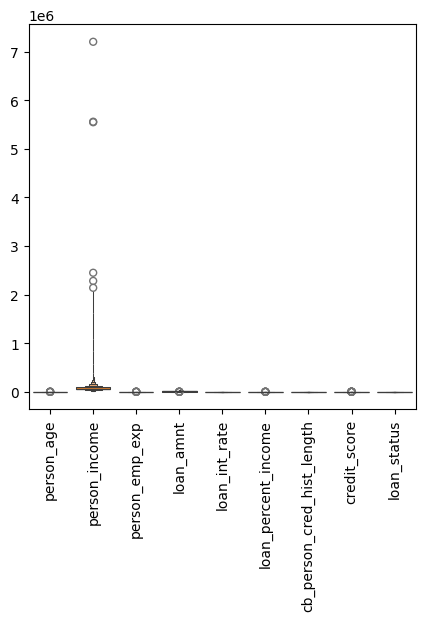

In [10]:
plt.figure(figsize=(5,5))
sns.boxenplot(data=df)
plt.xticks(rotation = 90)
plt.show()

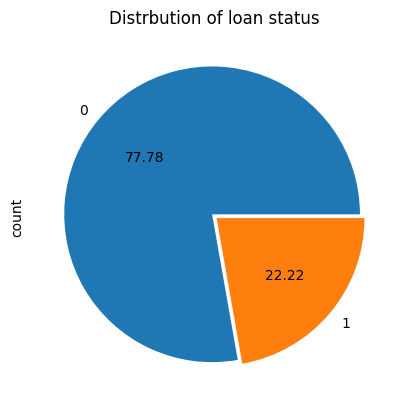

In [11]:
# Distrbution of loan status
'''
Data Insights
77.78% People not approved thier loan from bank
22.222% People approved thier loan from bank
'''
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])
plt.title('Distrbution of loan status')
plt.show()

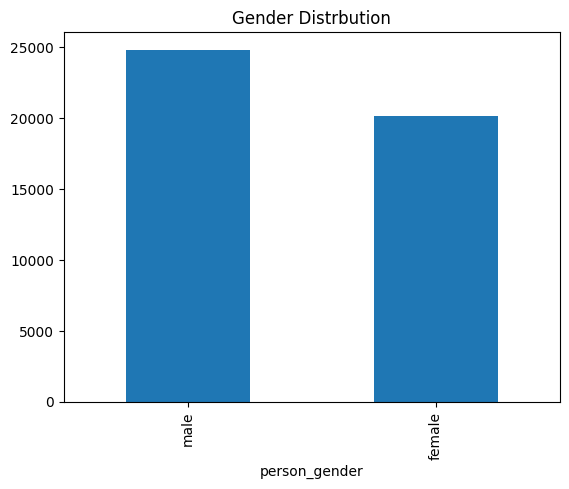

In [12]:
# Gender Distrbution
df['person_gender'].value_counts().plot(kind='bar')
plt.title('Gender Distrbution')
plt.show()

In [13]:
# Loan Staus Based On Gender
# Loan Is Aprroved and gender must be male
loan_status_approved_male = df[(df['loan_status'] == 1) & (df['person_gender'] == 'male')]
loan_status_approved_male


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
12,23.0,male,Bachelor,114860.0,3,RENT,35000.0,VENTURE,7.90,0.30,2.0,573,No,1
13,26.0,male,Master,130713.0,0,RENT,35000.0,EDUCATION,18.39,0.27,4.0,708,No,1
18,23.0,male,Bachelor,136628.0,0,RENT,35000.0,DEBTCONSOLIDATION,18.25,0.26,4.0,709,No,1
24,22.0,male,Bachelor,97420.0,1,RENT,33950.0,PERSONAL,14.54,0.35,4.0,691,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [14]:
loan_status_approved_female = df[(df['loan_status'] == 1) & (df['person_gender'] == 'female')]
loan_status_approved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,28.0,female,Associate,49170.0,4,RENT,10401.0,HOMEIMPROVEMENT,11.97,0.21,6.0,677,No,1
44992,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44994,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678,No,1


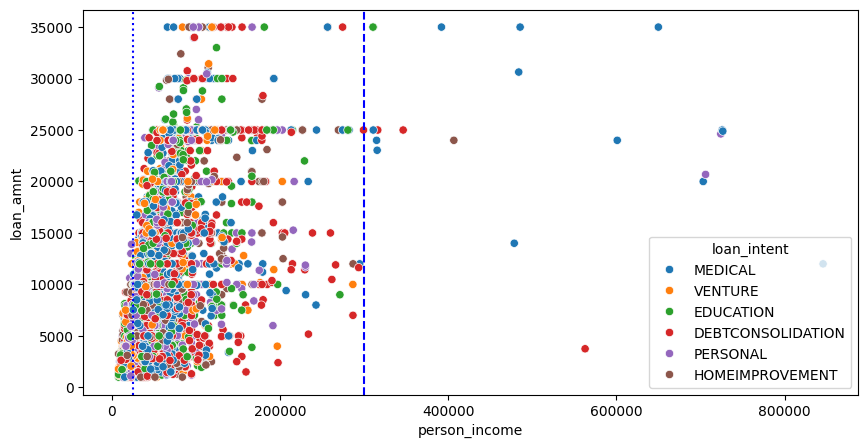

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],
                y = loan_status_approved_male['loan_amnt'],
                hue = loan_status_approved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axvline(25000,linestyle = ':',c = 'b')
plt.show()

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],
                y = loan_status_notapproved_male['loan_amnt'],
                hue = loan_status_notapproved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axvline(25000,linestyle = ':',c = 'b')
plt.show()

NameError: name 'loan_status_notapproved_male' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
loan_status_notapproved_male= df[(df['loan_status'] == 0) & (df['person_gender'] == 'male')]
loan_status_notapproved_male